In [35]:
import numpy as np
import os
import cv2
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from skimage import io
from glob import glob
from tqdm import tqdm
train_path='/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/'

In [36]:
train_images=[]
train_masks=[]
def load_images(path):
    temp_img,temp_mask=[],[]
    images=glob(os.path.join(path,'*.jpg'))
    for i in tqdm(images):
        i=cv2.imread(i)
        i=cv2.normalize(i,None,0,1,cv2.NORM_MINMAX,cv2.CV_32F)
        img=i[:,:256]
        msk=i[:,256:]  
        temp_img.append(img)
        temp_mask.append(msk) 
    return temp_img,temp_mask

train_images,train_masks=load_images(train_path)

100%|██████████| 2975/2975 [00:16<00:00, 180.20it/s]


In [37]:
batch_size = 32
train_batches = len(train_images)//batch_size
train_loss = []
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)
model.conv = nn.Conv2d(32, 3,1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

num_epochs = 70

Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [38]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
for epoch in range(num_epochs):
    print("Epoch : ", epoch+1 )
    for batch in tqdm(range(train_batches)):
        optimizer.zero_grad()
        train_img_batch = train_images[batch*batch_size:(batch+1)*batch_size]
        train_msk_batch = train_masks[batch*batch_size:(batch+1)*batch_size]
        img = np.array(train_img_batch).reshape(len(train_img_batch), 3, 256, 256)
        mask = np.array(train_msk_batch).reshape(len(train_msk_batch),3, 256, 256)
        img = torch.from_numpy(img).float()
        mask = torch.from_numpy(mask).float()
        input_images_pil = [transforms.functional.to_pil_image(i) for i in img]

        img = torch.stack([transform(i) for i in input_images_pil])
        outputs = model(img.cuda())
        loss = criterion(outputs, mask.cuda())
        loss.backward()
        optimizer.step()
        train_loss = loss.item()
    print('Train Loss: ', train_loss)
torch.save(model.state_dict(), 'model3.pt')

Epoch :  1


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.02953970432281494
Epoch :  2


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.027615197002887726
Epoch :  3


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.02661067619919777
Epoch :  4


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.025587236508727074
Epoch :  5


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.02454999089241028
Epoch :  6


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.023775994777679443
Epoch :  7


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.021334100514650345
Epoch :  10


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.020664434880018234
Epoch :  11


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.020000815391540527
Epoch :  12


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.019497361034154892
Epoch :  13


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.01910095103085041
Epoch :  14


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.018635516986250877
Epoch :  15


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.018345240503549576
Epoch :  16


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.01810779795050621
Epoch :  17


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.01788840815424919
Epoch :  18


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.017588559538125992
Epoch :  19


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.01708543673157692
Epoch :  20


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.016799386590719223
Epoch :  21


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.016609281301498413
Epoch :  22


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.01655043661594391
Epoch :  23


100%|██████████| 92/92 [00:41<00:00,  2.20it/s]


Train Loss:  0.016309745609760284
Epoch :  24


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.0158858485519886
Epoch :  25


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.015658587217330933
Epoch :  26


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.015552878379821777
Epoch :  27


100%|██████████| 92/92 [00:42<00:00,  2.17it/s]


Train Loss:  0.015624204650521278
Epoch :  28


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.014841502532362938
Epoch :  31


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.014150585047900677
Epoch :  32


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.014031175523996353
Epoch :  33


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.013966950587928295
Epoch :  34


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.013479150831699371
Epoch :  35


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.01337000634521246
Epoch :  36


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.01293560117483139
Epoch :  37


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.01307737361639738
Epoch :  38


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.01288253627717495
Epoch :  39


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.012638701125979424
Epoch :  40


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.012209922075271606
Epoch :  41


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.012202141806483269
Epoch :  42


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.01216110959649086
Epoch :  43


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.011999383568763733
Epoch :  44


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.011169317178428173
Epoch :  45


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.011260101571679115
Epoch :  46


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.011060599237680435
Epoch :  47


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.010691950097680092
Epoch :  48


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.010627957992255688
Epoch :  49


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.01053161546587944
Epoch :  50


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.010380078107118607
Epoch :  53


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.009990934282541275
Epoch :  54


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.009826606139540672
Epoch :  55


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.009670881554484367
Epoch :  56


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.009535434655845165
Epoch :  57


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.009293648414313793
Epoch :  58


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.009249859489500523
Epoch :  59


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.009323371574282646
Epoch :  60


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.008897530846297741
Epoch :  61


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.008674366399645805
Epoch :  62


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.00858000386506319
Epoch :  63


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.008467644453048706
Epoch :  64


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]


Train Loss:  0.008292105048894882
Epoch :  65


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.00848257914185524
Epoch :  66


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.00830473005771637
Epoch :  67


100%|██████████| 92/92 [00:42<00:00,  2.19it/s]


Train Loss:  0.008154302835464478
Epoch :  68


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.008106245659291744
Epoch :  69


100%|██████████| 92/92 [00:41<00:00,  2.19it/s]


Train Loss:  0.007849251851439476
Epoch :  70


100%|██████████| 92/92 [00:42<00:00,  2.18it/s]

Train Loss:  0.007737475913017988


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


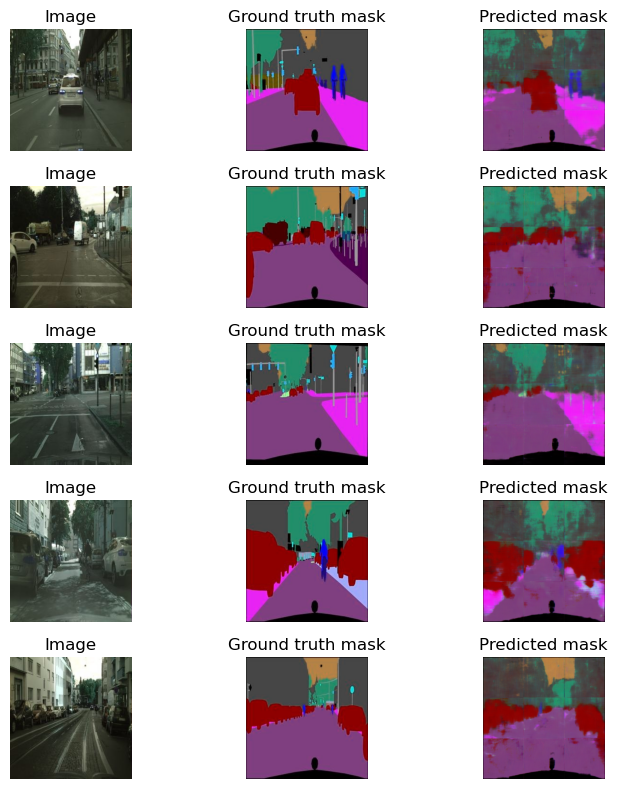

In [40]:
model_path = 'model3.pt'
model = model.to(device)
model.load_state_dict(torch.load(model_path))

img_ = train_images[10:15]
msk_ = train_masks[10:15]
img_batch = np.reshape(img_, (5, 3, 256, 256))
model.eval()
with torch.no_grad():
    img_batch = torch.from_numpy(img_batch).float()
    input_images_pil = [transforms.functional.to_pil_image(i) for i in img_batch]
    
    img_batch = torch.stack([transform(i) for i in input_images_pil])
    predictions = model(torch.tensor(img_batch).cuda())
    predictions = predictions.cpu().numpy()
predictions = np.reshape(predictions, (5, 256, 256,3))
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8, 8))
for i in range(5):
    axes[i, 0].imshow(img_[i])
    axes[i, 1].imshow(msk_[i])
    axes[i, 2].imshow(predictions[i])
    axes[i, 0].axis('off')
    axes[i, 1].axis('off')
    axes[i, 2].axis('off')
    axes[i, 0].set_title('Image')
    axes[i, 1].set_title('Ground truth mask')
    axes[i, 2].set_title('Predicted mask')
plt.tight_layout()
plt.show()